In [1]:
#ok for this we're going to find the most probable value (aka the mode) of the scintillator QDC counts and compare them to voltage in a lovely graph

In [5]:
from ROOT import TFile, TCanvas, TH1D
import numpy as np
runNumbers=["1572187615", "1572199259", "1572169691", "1572167644", "1571991208"]
            


545.7025824505193
 FCN=2657.52 FROM MIGRAD    STATUS=CONVERGED     206 CALLS         207 TOTAL
                     EDM=3.75109e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.22038e+04   3.26203e+02   4.92074e+00  -3.23832e-06
   2  MPV          5.45703e+02   4.03896e-01   9.95182e-03  -1.36046e-03
   3  Sigma        4.02521e+01   2.52584e-01   1.03871e-05  -1.40870e+00


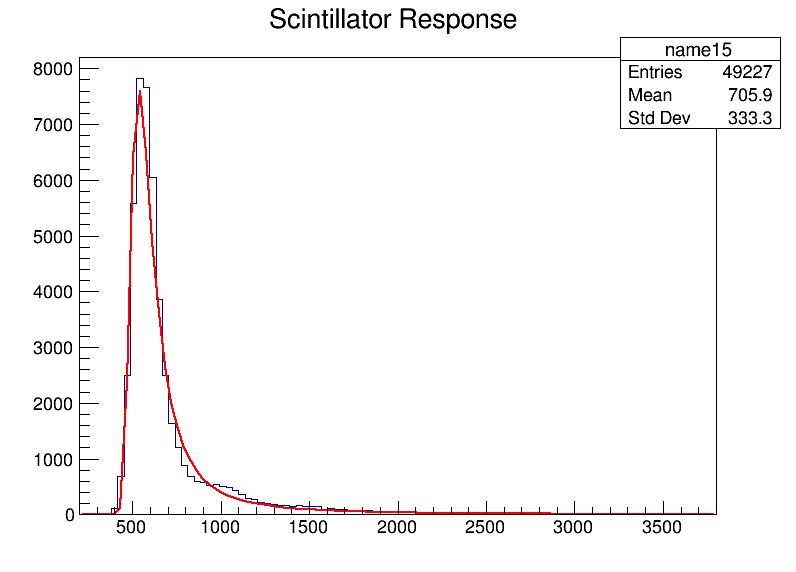

In [6]:
#here's the code Sam used on Paul's suggestion to get the MPVs
from ROOT import TF1
import matplotlib.pyplot as plt
runName="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572187615.root"
importFile = TFile(runName, "READ")
RAWdata=importFile.Get("RAWdata")
c1=TCanvas("MimosaPlots", "MimosaPlots", 800, 600)
hist1=TH1D("name15", "Scintillator Response", 100, 200, 3800)
RAWdata.Draw("QDC0_ch0>>name15", "QDC0_ch0>200 && QDC0_ch0<3800")
hist1.Draw()

fitti=TF1("fitti", "landau") #the distribution in this sense is the Landau distribution

hist1.Fit(fitti) #Paul suggests eventually getting a better fit by mushing together landau and gaussian
print(fitti.GetParameter("MPV")) #and MPV refers to the peak

c1.Draw()

[(2353.6174823190927, 2491.1135592299997)]
 FCN=2657.52 FROM MIGRAD    STATUS=CONVERGED     206 CALLS         207 TOTAL
                     EDM=3.75109e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.22038e+04   3.26203e+02   4.92074e+00  -3.23832e-06
   2  MPV          5.45703e+02   4.03896e-01   9.95182e-03  -1.36046e-03
   3  Sigma        4.02521e+01   2.52584e-01   1.03871e-05  -1.40870e+00
 FCN=152.26 FROM MIGRAD    STATUS=CONVERGED     111 CALLS         112 TOTAL
                     EDM=2.10345e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.70635e+03   4.93246e+01   2.06602e-01   1.03580e-05
   2  MPV          3.10787e+03   3.20217e+00   1.38976e-02   2.0

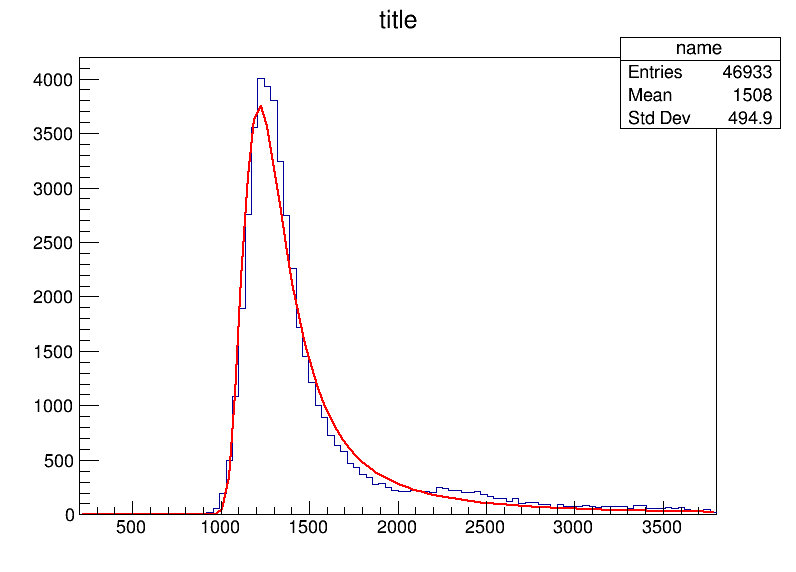

In [12]:
#surprise suprise Sam's code worked. Let's do it again for this first plot - 
#Now we're going to do it for all the ones in our runNumbers array
iterat=1
maxum=12

scintMeans=[]
holdScint=[]

fitti=TF1("fitti", "landau")

for run in runNumbers:
    runName="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile = TFile(runName, "READ")
    RAWdata=importFile.Get("RAWdata")
    hist1=TH1D("name", "title", 100, 200, 3800)

    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    hist1.Fit(fitti)

    holdScint+=[(fitti.GetParameter("MPV"), hist1.GetMean())] #store both the Landau MPV and mean to our hold
    if iterat%4==0:
        scintMeans+=[(np.mean([i[0] for i in holdScint]), np.mean([i[1] for i in holdScint]))] #and then calculate both their means and store it
        holdScint=[]
    iterat+=1
    if iterat>maxum:
        break
    
c1.Draw()
print(scintMeans)

[(545.7025824505193, 705.8504682389746), (3107.869361140928, 3206.90238375021), (2883.0816607583715, 3028.307662657008), (2877.8163249265517, 3023.393722273806), (3011.6478308159903, 3132.457529668338), (1237.2202534845203, 1508.128118807662)]
 FCN=2657.52 FROM MIGRAD    STATUS=CONVERGED     206 CALLS         207 TOTAL
                     EDM=3.75109e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.22038e+04   3.26203e+02   4.92074e+00  -3.23832e-06
   2  MPV          5.45703e+02   4.03896e-01   9.95182e-03  -1.36046e-03
   3  Sigma        4.02521e+01   2.52584e-01   1.03871e-05  -1.40870e+00
 FCN=152.26 FROM MIGRAD    STATUS=CONVERGED     111 CALLS         112 TOTAL
                     EDM=2.10345e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   

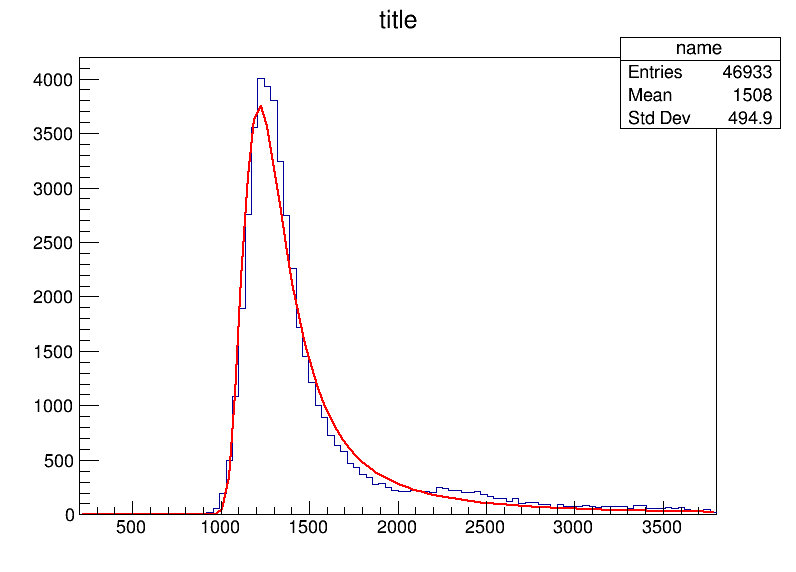

In [17]:
runNumbers=["1572187615", "1572199259", "1572169691", "1572167644", "1571991208","1572001725"]
from ROOT import TF1, TFile, TCanvas, TH1D
import numpy as np
import matplotlib.pyplot as plt
iterat=1
maxum=6

scintMeans=[]
holdScint=[]

fitti=TF1("fitti", "landau")

for run in runNumbers:
    runName="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile = TFile(runName, "READ")
    RAWdata=importFile.Get("RAWdata")
    hist1=TH1D("name", "title", 100, 200, 3800)

    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    hist1.Fit(fitti)

    holdScint+=[(fitti.GetParameter("MPV"), hist1.GetMean())] #store both the Landau MPV and mean to our hold
    if iterat%1==0:
        scintMeans+=[(np.mean([i[0] for i in holdScint]), np.mean([i[1] for i in holdScint]))] #and then calculate both their means and store it
        holdScint=[]
    iterat+=1
    if iterat>maxum:
        break
    
c1.Draw()
print(scintMeans)